#Assignment 2

Max collaborators = 3

Hand holding is low for this assignment. Adjust accordingly. In case of confusion, feel free to reach out to your lab faculties. Good luck.

In [86]:
COLLABORATORS_NAME = "Naimur Rahman,Md. Mukaddimul Kabir, Aritra Chakraborty"
COLLABORATORS_ID = "24241138, 22141006, 22101892"

#Loading dependencies

In [87]:
import numpy as np
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
from skimage import color,io, img_as_float
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#add if more dependencies are required here

In [88]:

device = "cuda" if torch.backends.mps.is_available() else "cpu"
print(device)

cpu


#Loading dataset

In [89]:
id =  24241138 #insert id of any one collaborator in int

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, y_train = sklearn.utils.resample(x_train, y_train, replace = False, n_samples = 5000, random_state = id, stratify = y_train)
x_test, y_test = sklearn.utils.resample(x_test, y_test, replace = False, n_samples = 1000, random_state = id, stratify = y_train)

#Task 1: Training a logistic regressor [10 Marks]

###1. Convert the images to grayscale

In [90]:
def rgbToGray(array):
    gray = []
    for img in array:
        gray.append(color.rgb2gray(img))
    gray = np.array(gray)
    return gray
x_train_gray = rgbToGray(x_train)
x_test_gray = rgbToGray(x_test)
x_train_gray_cnn = rgbToGray(x_train)
x_test_gray_cnn = rgbToGray(x_test)

### 2. Prepare the grayscale images for logistic regressor (reshape and normalize)

Use z-score normalization.

In [91]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0],-1)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0],-1)

x_train = x_train_gray.astype(np.float32)
x_test = x_test_gray.astype(np.float32)

x_train = (x_train - x_train.mean(axis = 0, keepdims = True))/(x_train.std(axis = 0, keepdims = True) + 1e-4)
x_test = (x_test - x_test.mean(axis = 0, keepdims = True))/(x_test.std(axis = 0, keepdims = True) + 1e-4)

###3. Create a validation set (20%)

In [92]:

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2, random_state=42,stratify=y_train)

###4. Compute class weights

Go through this link - https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [93]:
class_weight_comp = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
      y=y_train.flatten())
print(class_weight_comp)
class_weight_comp = dict(zip(np.unique(y_train),class_weight_comp))
print(class_weight_comp)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
{np.uint8(0): np.float64(1.0), np.uint8(1): np.float64(1.0), np.uint8(2): np.float64(1.0), np.uint8(3): np.float64(1.0), np.uint8(4): np.float64(1.0), np.uint8(5): np.float64(1.0), np.uint8(6): np.float64(1.0), np.uint8(7): np.float64(1.0), np.uint8(8): np.float64(1.0), np.uint8(9): np.float64(1.0)}


###5. Run the logistic regressor

Use L2 regularizer. Find the C hyperparameter value through grid search. Pick the testing values according to your understanding. Use at least 3 test values and at max 5. Use the computed class weights while training your model.

In [94]:
print("x_train.shape: ",x_train.shape)
print("y_train.shape: ",y_train.shape)
print("y_test.shape",y_test.shape)

x_train.shape:  (4000, 1024)
y_train.shape:  (4000, 1)
y_test.shape (1000, 1)


In [95]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [96]:
model = LogisticRegression()

params_grid = {
    "C": [0.01, 0.02, 0.05, 0.08, 0.1],
    "penalty": ['l2'],
    "solver": ['lbfgs'],
    "max_iter": [1000, 2000, 3000],
    "class_weight": ['balanced']
}


logistic_regressor = GridSearchCV(
    model,
    params_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=4
)

logistic_regressor.fit(x_train,y_train.ravel())

print(logistic_regressor.best_estimator_)
print(logistic_regressor.best_params_)
print(logistic_regressor.best_score_)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.24225190480528677


###6. Evaluate the logistic regressor on the test set

In [97]:
from sklearn.metrics import accuracy_score

y_pred = logistic_regressor.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

print(test_acc)

0.262


###7. Write code to pick up a random image from the test set and display it

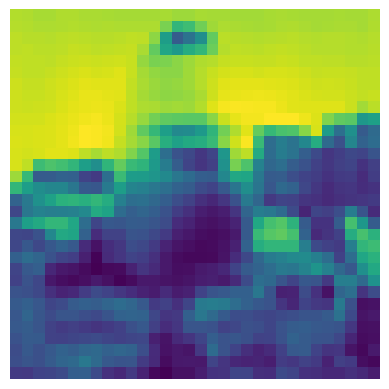

In [98]:
random_index = np.random.randint(y_test.shape[0], size = 1)


img = x_test[random_index].reshape(32, 32)

plt.imshow(img)
plt.axis("off")
plt.show()


###8. Print the predicted class vs the original class

Do not print out the numerical class. Map it from here - https://keras.io/2/api/datasets/cifar10/

In [99]:
y_pred = logistic_regressor.predict(x_test)
y_test_c = y_test.ravel()
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Print predicted vs original class for first 20 test samples
for i in range(20):
    print(f"Sample {i+1}: Predicted = {class_names[y_pred[i]]}, Original = {class_names[y_test_c[i]]}")

Sample 1: Predicted = automobile, Original = automobile
Sample 2: Predicted = ship, Original = truck
Sample 3: Predicted = automobile, Original = automobile
Sample 4: Predicted = bird, Original = ship
Sample 5: Predicted = automobile, Original = automobile
Sample 6: Predicted = deer, Original = dog
Sample 7: Predicted = truck, Original = truck
Sample 8: Predicted = truck, Original = automobile
Sample 9: Predicted = frog, Original = deer
Sample 10: Predicted = airplane, Original = airplane
Sample 11: Predicted = frog, Original = frog
Sample 12: Predicted = ship, Original = airplane
Sample 13: Predicted = truck, Original = ship
Sample 14: Predicted = horse, Original = cat
Sample 15: Predicted = ship, Original = deer
Sample 16: Predicted = airplane, Original = dog
Sample 17: Predicted = frog, Original = cat
Sample 18: Predicted = automobile, Original = truck
Sample 19: Predicted = frog, Original = cat
Sample 20: Predicted = dog, Original = airplane


#Task 2: Training a convolutional neural network [20 Marks]

We will not strictly control how you implement this code. You can use either Tensorflow or PyTorch. However the structure of the network must be -

```
Input -> Conv1 -> Conv2 -> Conv3 -> Fully Connected 1 -> Fully Connected 2 -> Output
```

Use activation functions and pooling as you want. Feel free to adjust dimensions as you need. Set the hyperparameters yourself. Use a maximum learning rate of 0.01 and a maximum epoch number of 100. Use AdamW as optimizer.

**Try achieving good accuracy. There are marks for that.**

###1. Train the model on grayscale images

You do not need to use the validation set. Train on the initial train set. Recalculate the class weights again and pass it to the optimizer function. Normalize the images before processing.

#Imports for task 2

In [100]:

import random
import torch.nn as nn
import torch.nn.functional as F


In [134]:
class CNN(nn.Module):
    def __init__(self, c_in=1, output_dim=128):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(c_in, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, output_dim, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(output_dim*4*4, output_dim)
        self.fc2   = nn.Linear(output_dim, 64)
        self.out   = nn.Linear(64, 10)
        self.relu  = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.out(x)
        return x

In [135]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda


In [136]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


x_train = x_train.astype(np.float32)/255.0
x_test  = x_test.astype(np.float32)/255.0

y_train = y_train.astype(np.int64).squeeze()
y_test  = y_test.astype(np.int64).squeeze()


x_train_gray = np.array([color.rgb2gray(img) for img in x_train], dtype=np.float32)
x_test_gray  = np.array([color.rgb2gray(img) for img in x_test], dtype=np.float32)


mean_train = x_train_gray.mean(axis=(0,1,2), keepdims=True)
std_train  = x_train_gray.std(axis=(0,1,2), keepdims=True) + 1e-4

x_train_gray = (x_train_gray - mean_train)/std_train
x_test_gray  = (x_test_gray - mean_train)/std_train

In [137]:
x_train_tensor = torch.tensor(x_train_gray, device=device).unsqueeze(1)
x_test_tensor  = torch.tensor(x_test_gray, device=device).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, device=device)
y_test_tensor  = torch.tensor(y_test, device=device)

In [138]:
batch_size = 128
learning_rate = 0.001
epochs = 120

classifier = CNN(c_in=1).to(device)
optimizer = torch.optim.AdamW(classifier.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()


train_size = x_train_tensor.shape[0]
batch_len = int(np.ceil(train_size / batch_size))

for epoch in range(epochs):
    classifier.train()
    total_loss = 0
    total_correct = 0

    for i in range(batch_len):
        start = i * batch_size
        end   = min((i+1)*batch_size, train_size)

        x_batch = x_train_tensor[start:end]
        y_batch = y_train_tensor[start:end]

        optimizer.zero_grad()
        y_pred = classifier(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x_batch.size(0)
        total_correct += (y_pred.argmax(dim=1) == y_batch).sum().item()

    epoch_loss = total_loss / train_size
    epoch_acc  = total_correct / train_size

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}")

Epoch 1/120 | Loss: 1.6342 | Accuracy: 0.4062
Epoch 10/120 | Loss: 0.4372 | Accuracy: 0.8493
Epoch 20/120 | Loss: 0.1599 | Accuracy: 0.9433
Epoch 30/120 | Loss: 0.0740 | Accuracy: 0.9744
Epoch 40/120 | Loss: 0.0548 | Accuracy: 0.9811
Epoch 50/120 | Loss: 0.0442 | Accuracy: 0.9852
Epoch 60/120 | Loss: 0.0384 | Accuracy: 0.9872
Epoch 70/120 | Loss: 0.0311 | Accuracy: 0.9894
Epoch 80/120 | Loss: 0.0227 | Accuracy: 0.9920
Epoch 90/120 | Loss: 0.0292 | Accuracy: 0.9904
Epoch 100/120 | Loss: 0.0276 | Accuracy: 0.9909
Epoch 110/120 | Loss: 0.0290 | Accuracy: 0.9899
Epoch 120/120 | Loss: 0.0164 | Accuracy: 0.9946


###2. Evaluate the model on the grayscale test set

In [139]:
classifier.eval()
with torch.no_grad():
    y_test_pred = classifier(x_test_tensor)
    test_acc = (y_test_pred.argmax(dim=1) == y_test_tensor).float().mean().item()
print("Test Accuracy:", test_acc)

Test Accuracy: 0.7098999619483948


###3. Write code to pick up a random image from the test set and display it

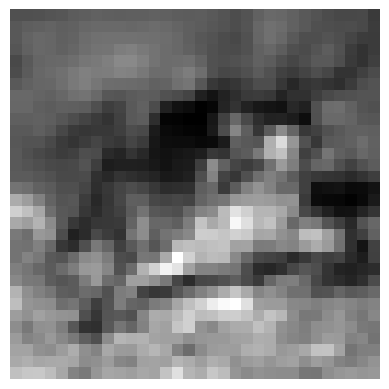

In [109]:
idx = random.randint(0, x_test_tensor.shape[0]-1)
img = x_test_tensor[idx].cpu().squeeze()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


###4. Print the predicted class vs the original class

In [110]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

pred_class = class_names[y_test_pred.argmax(dim=1)[idx]]
true_class = class_names[y_test_tensor[idx]]
print(f"Predicted: {pred_class} | True: {true_class}")

Predicted: cat | True: frog


###5. Train the model on the RGB images

Keep the model same.

In [140]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32, device=device).permute(0,3,1,2)
x_test_tensor  = torch.tensor(x_test, dtype=torch.float32, device=device).permute(0,3,1,2)
y_train_tensor = torch.tensor(y_train, dtype=torch.long, device=device)
y_test_tensor  = torch.tensor(y_test, dtype=torch.long, device=device)

In [141]:
batch_size = 64
learning_rate = 0.001
epochs = 120

classifier = CNN(c_in=3).to(device)
optimizer = torch.optim.AdamW(classifier.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()


train_size = x_train_tensor.shape[0]
batch_len = int(np.ceil(train_size / batch_size))

for epoch in range(epochs):
    classifier.train()
    total_loss = 0
    total_correct = 0

    for i in range(batch_len):
        start = i * batch_size
        end   = min((i+1)*batch_size, train_size)

        x_batch = x_train_tensor[start:end]
        y_batch = y_train_tensor[start:end]

        optimizer.zero_grad()
        y_pred = classifier(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x_batch.size(0)
        total_correct += (y_pred.argmax(dim=1) == y_batch).sum().item()

    epoch_loss = total_loss / train_size
    epoch_acc  = total_correct / train_size

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}")

Epoch 1/120 | Loss: 1.5819 | Accuracy: 0.4152
Epoch 10/120 | Loss: 0.5586 | Accuracy: 0.8015
Epoch 20/120 | Loss: 0.3764 | Accuracy: 0.8669
Epoch 30/120 | Loss: 0.2824 | Accuracy: 0.9003
Epoch 40/120 | Loss: 0.2276 | Accuracy: 0.9199
Epoch 50/120 | Loss: 0.1926 | Accuracy: 0.9315
Epoch 60/120 | Loss: 0.1758 | Accuracy: 0.9381
Epoch 70/120 | Loss: 0.1608 | Accuracy: 0.9446
Epoch 80/120 | Loss: 0.1395 | Accuracy: 0.9512
Epoch 90/120 | Loss: 0.1346 | Accuracy: 0.9532
Epoch 100/120 | Loss: 0.1264 | Accuracy: 0.9561
Epoch 110/120 | Loss: 0.1234 | Accuracy: 0.9564
Epoch 120/120 | Loss: 0.1265 | Accuracy: 0.9573


###6. Evaluate the model on the RGB images

In [142]:
classifier.eval()
with torch.no_grad():
    y_test_pred = classifier(x_test_tensor)
    test_acc = (y_test_pred.argmax(dim=1) == y_test_tensor).float().mean().item()
print("Test Accuracy:", test_acc)

Test Accuracy: 0.6872000098228455


###7. Write code to pick up a random image from the test set and display it

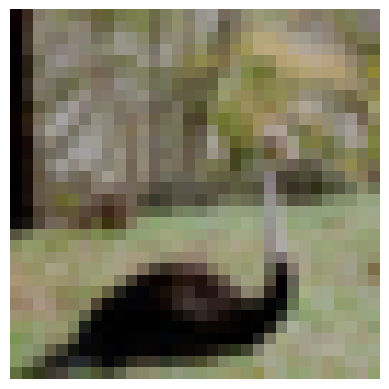

In [150]:
idx = random.randint(0, x_test.shape[0]-1)
img = x_test[idx].squeeze()
plt.imshow(img)
plt.axis('off')
plt.show()

###8. Print the predicted class vs the original class

In [145]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

pred_class = class_names[y_test_pred.argmax(dim=1)[idx]]
true_class = class_names[y_test_tensor[idx]]
print(f"Predicted: {pred_class} | True: {true_class}")

Predicted: dog | True: dog


###9. Add one more conv layer and check if it increases the performance for the RGB images

In [146]:
class CNN(nn.Module):
    def __init__(self, c_in=3, output_dim=128):
        super().__init__()
        self.conv1 = nn.Conv2d(c_in, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, output_dim, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(output_dim*2*2, output_dim)  # after 4 pools: 32->16->8->4->2
        self.fc2   = nn.Linear(output_dim, 64)
        self.out   = nn.Linear(64, 10)
        self.relu  = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # 32x32 -> 16x16
        x = self.pool(self.relu(self.conv2(x)))  # 16x16 -> 8x8
        x = self.pool(self.relu(self.conv3(x)))  # 8x8 -> 4x4
        x = self.pool(self.relu(self.conv4(x)))  # 4x4 -> 2x2
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.out(x)
        return x

In [147]:
classifier = CNN(c_in=3).to(device)


batch_size = 128
learning_rate = 0.002
epochs = 100

optimizer = torch.optim.AdamW(classifier.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

train_size = x_train_tensor.shape[0]
batch_len = int(np.ceil(train_size / batch_size))

# --- Training loop ---
for epoch in range(epochs):
    classifier.train()
    total_loss = 0
    total_correct = 0

    for i in range(batch_len):
        start = i * batch_size
        end   = min((i+1)*batch_size, train_size)

        x_batch = x_train_tensor[start:end]
        y_batch = y_train_tensor[start:end]

        optimizer.zero_grad()
        y_pred = classifier(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x_batch.size(0)
        total_correct += (y_pred.argmax(dim=1) == y_batch).sum().item()

    epoch_loss = total_loss / train_size
    epoch_acc  = total_correct / train_size

    if (epoch+1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}")

Epoch 1/100 | Loss: 1.6805 | Accuracy: 0.3720
Epoch 5/100 | Loss: 0.7616 | Accuracy: 0.7305
Epoch 10/100 | Loss: 0.5242 | Accuracy: 0.8155
Epoch 15/100 | Loss: 0.3667 | Accuracy: 0.8698
Epoch 20/100 | Loss: 0.2867 | Accuracy: 0.8982
Epoch 25/100 | Loss: 0.2293 | Accuracy: 0.9170
Epoch 30/100 | Loss: 0.1983 | Accuracy: 0.9299
Epoch 35/100 | Loss: 0.1686 | Accuracy: 0.9412
Epoch 40/100 | Loss: 0.1385 | Accuracy: 0.9521
Epoch 45/100 | Loss: 0.1221 | Accuracy: 0.9584
Epoch 50/100 | Loss: 0.1206 | Accuracy: 0.9590
Epoch 55/100 | Loss: 0.1120 | Accuracy: 0.9616
Epoch 60/100 | Loss: 0.0971 | Accuracy: 0.9675
Epoch 65/100 | Loss: 0.0917 | Accuracy: 0.9687
Epoch 70/100 | Loss: 0.0896 | Accuracy: 0.9698
Epoch 75/100 | Loss: 0.0881 | Accuracy: 0.9702
Epoch 80/100 | Loss: 0.0861 | Accuracy: 0.9719
Epoch 85/100 | Loss: 0.0783 | Accuracy: 0.9739
Epoch 90/100 | Loss: 0.0762 | Accuracy: 0.9746
Epoch 95/100 | Loss: 0.0703 | Accuracy: 0.9770
Epoch 100/100 | Loss: 0.0780 | Accuracy: 0.9754


###10. Use the next markup to write down your observations and reasonings on the performances of the models

The performane of Logistics regression is very poor is has to be.becuse the data structure is complex for it.so can't blame it.but in ***CNN (3 layer)*** we see the accuracy is 99.12 for grayscale and 99.06 for RGB.maybe we could have look for more tuning in batch_size.but when i tried with 120 epocs and lr=0.002 the preformance dropped and in anoter scenario i kept 120 epocs and lr = 0.001 performance increased so i can say learning rate is the factor in this dataset and model.but using 4 layer performaced dropped maybe i made it a bit complex and data got distorted.